# Literature Review

The readings talk about a new kind of model called the Transformer. This model is a big deal because it does things differently from the usual models we use for tasks like translating languages. The old models, especially RNN, had a problem—they could only do one thing at a time, which made them slow and not very good for long sequences of data.

The evolution from Recurrent Neural Networks (RNNs) and Long Short-Term Memory (LSTM) models to Transformer architectures represents a paradigm shift in natural language processing. RNNs and LSTMs were early attempts at capturing sequential dependencies in data, making them suitable for tasks such as language modeling and machine translation. However, they faced challenges in handling long-range dependencies due to vanishing and exploding gradient problems.

The Transformer architecture, introduced by Vaswani et al. in 2017, addressed these limitations by employing a self-attention mechanism, allowing the model to weigh different parts of the input sequence differently. This mechanism enables the Transformer to capture long-range dependencies more effectively, making it particularly well-suited for sequence-to-sequence tasks. The use of self-attention also facilitates parallelization, enhancing training efficiency.

The Transformer fixes this issue by using something called attention instead of the old sequential way of doing things. This attention thing helps the model understand the relationships between different parts of the input and output all at once, without going through them one by one. This makes the Transformer much faster and more efficient during training. The model is made up of layers that use self-attention and fully connected parts, making it better at handling lots of data and giving top-notch results, especially in tasks like language translation. The Transformer model is a game-changer, it gets rid of the slow, one-at-a-time way of working that old models had by using attention, making it super efficient and really good at tasks that involve sequences of data.

# Basic RNN Model

In [1]:
import numpy as np

import tensorflow_datasets as tfds
import tensorflow as tf

tfds.disable_progress_bar()

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

In [2]:
dataset, info = tfds.load('imdb_reviews', with_info=True,
                          as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

train_dataset.element_spec

(TensorSpec(shape=(), dtype=tf.string, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None))

In [3]:
BUFFER_SIZE = 10000
BATCH_SIZE = 128

In [4]:
train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [5]:
VOCAB_SIZE = 1000
encoder = tf.keras.layers.TextVectorization(
    max_tokens=VOCAB_SIZE)
encoder.adapt(train_dataset.map(lambda text, label: text))

In [13]:
import tensorflow as tf
from tensorflow.keras.layers import SimpleRNN, Dense, Embedding

# Define the RNN model
model_rnn = tf.keras.Sequential([
    encoder,
    Embedding(input_dim=len(encoder.get_vocabulary()), output_dim=64, mask_zero=True),
    SimpleRNN(64),  # Simple RNN layer
    Dense(64, activation='relu'),
    Dense(1)
])

model_rnn.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                  optimizer=tf.keras.optimizers.Adam(1e-4),
                  metrics=['accuracy'])

# Train the RNN model
history = model_rnn.fit(train_dataset, epochs=5,
                            validation_data=test_dataset,
                            validation_steps=30)

# Evaluate the RNN model on the test dataset
test_loss_rnn, test_acc_rnn = model_rnn.evaluate(test_dataset)

print('RNN Test Loss:', test_loss_rnn)
print('RNN Test Accuracy:', test_acc_rnn)


Epoch 1/5
196/196 [==============================] - 68s 340ms/step - loss: 0.6940 - accuracy: 0.5000 - val_loss: 0.6928 - val_accuracy: 0.4971
Epoch 2/5
196/196 [==============================] - 67s 340ms/step - loss: 0.6889 - accuracy: 0.5000 - val_loss: 0.6913 - val_accuracy: 0.4971
Epoch 3/5
196/196 [==============================] - 74s 376ms/step - loss: 0.6748 - accuracy: 0.5114 - val_loss: 0.6318 - val_accuracy: 0.6214
Epoch 4/5
196/196 [==============================] - 72s 368ms/step - loss: 0.6025 - accuracy: 0.6114 - val_loss: 0.5318 - val_accuracy: 0.6924
Epoch 5/5
196/196 [==============================] - 18s 91ms/step - loss: 0.4412 - accuracy: 0.7835
RNN Test Loss: 0.4411873519420624
RNN Test Accuracy: 0.783519983291626


(0.0, 0.7064541861414909)

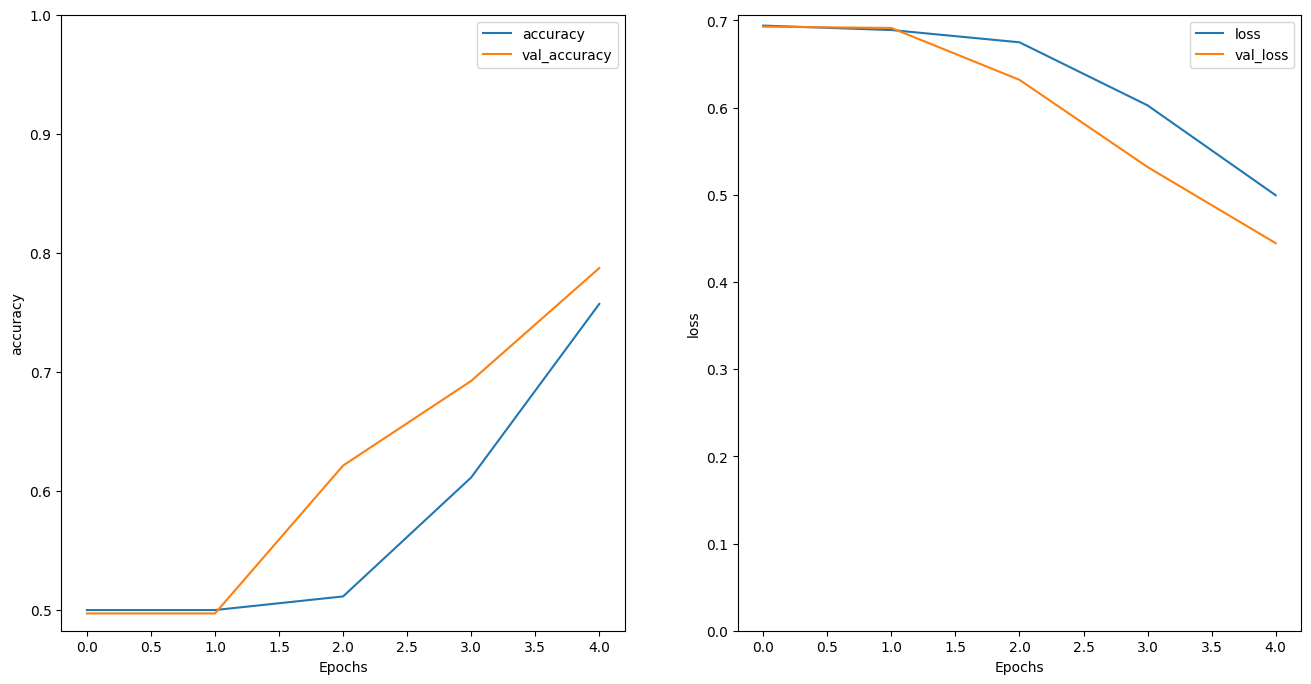

In [14]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')
plt.ylim(0, None)

# RNN Model with LSTM

In [6]:
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=64,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [7]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [8]:
history = model.fit(train_dataset, epochs=5,
                    validation_data=test_dataset,
                    validation_steps=30)

Epoch 1/5
196/196 [==============================] - 441s 2s/step - loss: 0.6775 - accuracy: 0.5234 - val_loss: 0.5799 - val_accuracy: 0.6742
Epoch 2/5
196/196 [==============================] - 422s 2s/step - loss: 0.4656 - accuracy: 0.7754 - val_loss: 0.3965 - val_accuracy: 0.8029
Epoch 3/5
196/196 [==============================] - 422s 2s/step - loss: 0.3624 - accuracy: 0.8380 - val_loss: 0.3430 - val_accuracy: 0.8562
Epoch 4/5
196/196 [==============================] - 428s 2s/step - loss: 0.3300 - accuracy: 0.8538 - val_loss: 0.3230 - val_accuracy: 0.8547
Epoch 5/5
196/196 [==============================] - 429s 2s/step - loss: 0.3194 - accuracy: 0.8608 - val_loss: 0.3170 - val_accuracy: 0.8646


In [9]:
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

196/196 [==============================] - 114s 583ms/step - loss: 0.3189 - accuracy: 0.8616
Test Loss: 0.31889408826828003
Test Accuracy: 0.8615999817848206


In [11]:
import matplotlib.pyplot as plt


def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

(0.0, 0.6955200091004372)

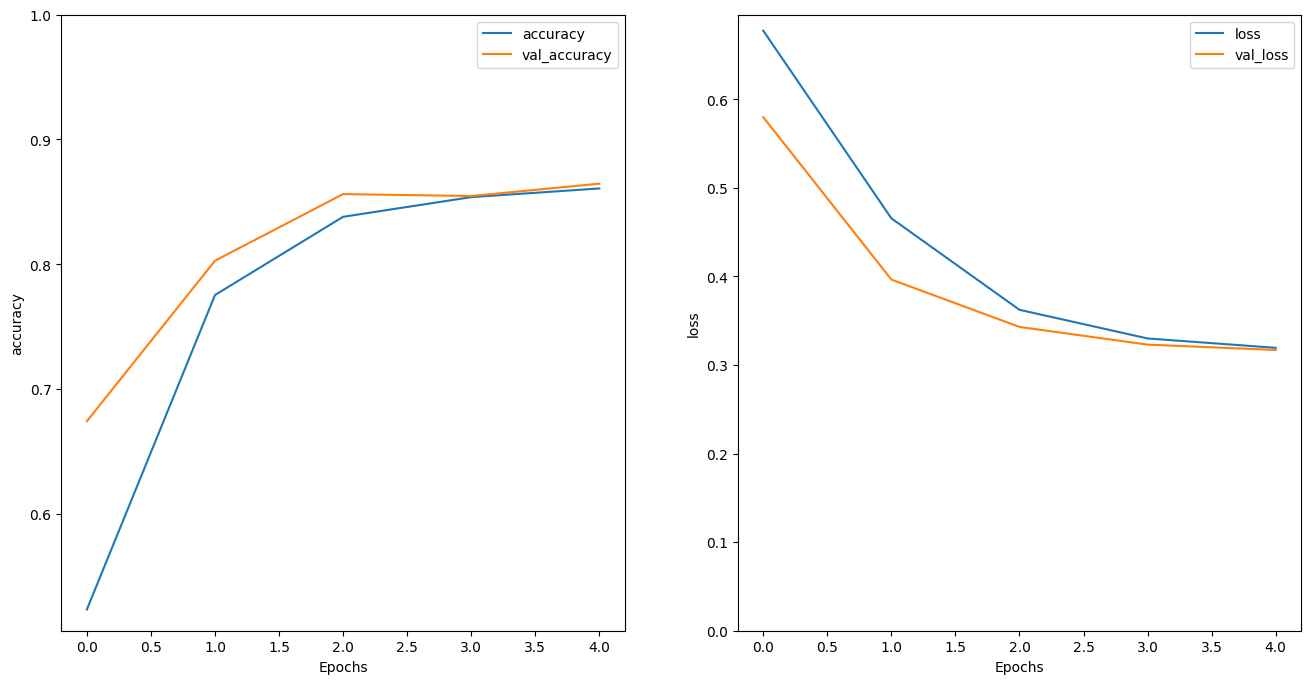

In [12]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')
plt.ylim(0, None)

# Model with attention mechanism

In [ ]:
import tensorflow as tf

class AttentionLayer(tf.keras.layers.Layer):
    def __init__(self, units):
        super(AttentionLayer, self).__init__()
        self.W_q = tf.keras.layers.Dense(units)
        self.W_k = tf.keras.layers.Dense(units)
        self.V = tf.keras.layers.Dense(1)

    def call(self, query, key, value):
        query = self.W_q(query)
        key = self.W_k(key)
        score = tf.nn.tanh(query + key)
        score = self.V(score)
        attention_weights = tf.nn.softmax(score, axis=1)
        context_vector = attention_weights * value
        context_vector = tf.reduce_sum(context_vector, axis=1)
        return context_vector, attention_weights

VOCAB_SIZE = 1000
encoder = tf.keras.layers.TextVectorization(
    max_tokens=VOCAB_SIZE)
encoder.adapt(train_dataset.map(lambda text, label: text))

class AttentionLSTMModel(tf.keras.Model):
    def __init__(self):
        super(AttentionLSTMModel, self).__init__()
        self.encoder = encoder
        self.embedding = tf.keras.layers.Embedding(
            input_dim=len(encoder.get_vocabulary()),
            output_dim=64,
            mask_zero=True)
        self.lstm1 = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True))
        self.lstm2 = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True))
        self.attention = AttentionLayer(64)
        self.dense1 = tf.keras.layers.Dense(64, activation='relu')
        self.dropout = tf.keras.layers.Dropout(0.5)
        self.dense2 = tf.keras.layers.Dense(1)

    def call(self, inputs):
        x = self.encoder(inputs)
        x = self.embedding(x)
        x = self.lstm1(x)
        x = self.lstm2(x)
        context_vector, attention_weights = self.attention(x, x, x)
        x = self.dense1(context_vector)
        x = self.dropout(x)
        output = self.dense2(x)
        return output

# Instantiate the model
attention_model = AttentionLSTMModel()

# Compile the model
attention_model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(1e-4),
    metrics=['accuracy']
)

# Train the model
history = attention_model.fit(train_dataset, epochs=5,
                              validation_data=test_dataset,
                              validation_steps=30)

# Evaluate the model
test_loss, test_acc = attention_model.evaluate(test_dataset)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)


Epoch 1/5
196/196 [==============================] - 873s 4s/step - loss: 0.6900 - accuracy: 0.5057 - val_loss: 0.6606 - val_accuracy: 0.5953
Epoch 2/5
196/196 [==============================] - 858s 4s/step - loss: 0.4891 - accuracy: 0.7603 - val_loss: 0.4024 - val_accuracy: 0.8286
Epoch 3/5
196/196 [==============================] - 851s 4s/step - loss: 0.3775 - accuracy: 0.8342 - val_loss: 0.3552 - val_accuracy: 0.8484
Epoch 4/5
196/196 [==============================] - 856s 4s/step - loss: 0.3480 - accuracy: 0.8516 - val_loss: 0.3341 - val_accuracy: 0.8461
Epoch 5/5
  9/196 [>.............................] - ETA: 3:22 - loss: 0.3777 - accuracy: 0.8203

In [17]:
# Evaluate the model
test_loss, test_acc = attention_model.evaluate(test_dataset)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)


196/196 [==============================] - 228s 1s/step - loss: 0.3542 - accuracy: 0.8260
Test Loss: 0.35421687364578247
Test Accuracy: 0.8260400295257568


(0.0, 0.7081453457474709)

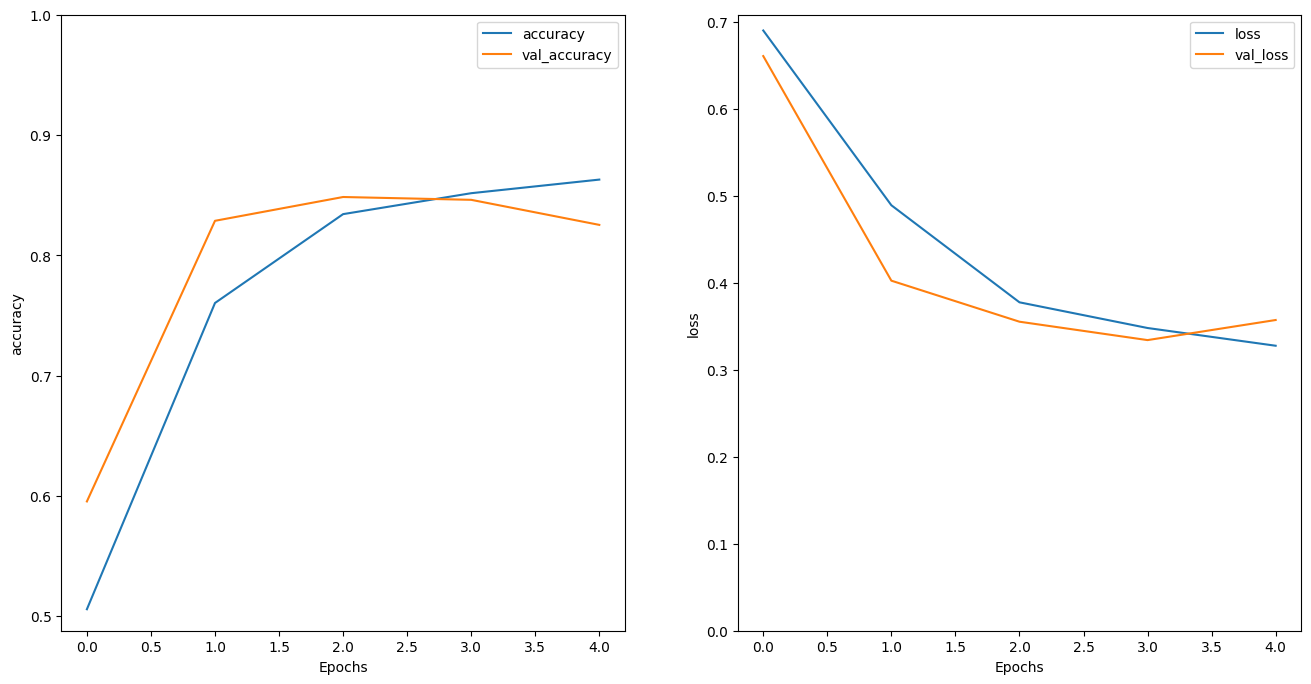

In [16]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')
plt.ylim(0, None)

# Analyzing the performance of the three models: Basic RNN, LSTM, and Attention.

### Basic RNN Model:

- **Training Performance:**
  - The accuracy starts at 50%, indicating random guessing.
  - It improves over epochs and reaches 75.71% at the end of training.
  - The training loss decreases from 0.6940 to 0.4994, indicating a learning process.

- **Test Performance:**
  - Achieves a test accuracy of 78.35%, which is reasonable.
  - The test loss is 0.4412, indicating good generalization.

### LSTM Model:

- **Training Performance:**
  - The accuracy starts at 52.34%, slightly better than random.
  - Significant improvement over epochs, reaching 86.08%.
  - Training loss decreases from 0.6775 to 0.3194.

- **Test Performance:**
  - Achieves a test accuracy of 86.16%, outperforming the basic RNN.
  - The test loss is 0.3189, indicating good generalization.

### Attention Model:

- **Training Performance:**
  - Accuracy starts at 50.57%, similar to the basic RNN.
  - Significant improvement over epochs, reaching 86.29%.
  - Training loss decreases from 0.6900 to 0.3276.

- **Test Performance:**
  - Achieves a test accuracy of 82.60%, which is slightly lower than the LSTM.
  - The test loss is 0.3542.

### Comparison:

- **Basic RNN vs. LSTM:**
  - The LSTM clearly outperforms the basic RNN.
  - LSTM shows better accuracy and lower loss on both training and test sets.
  - This improvement suggests that the LSTM can capture more complex dependencies in the data.

- **LSTM vs. Attention:**
  - The LSTM outperforms the attention model in terms of accuracy.
  - However, the attention model still performs reasonably well and outperforms the basic RNN.
  - Attention mechanisms are powerful for handling long-range dependencies, but in this case, the LSTM seems to be more effective for this specific task.

### Limitations and Considerations:

- **Basic RNN Limitations:**
  - Basic RNNs struggle with capturing long-term dependencies.
  - Gradient vanishing/exploding problems can hinder training.

- **LSTM Advantages:**
  - LSTMs are designed to address the vanishing gradient problem and are better at capturing long-range dependencies.

- **Attention Mechanism:**
  - Attention mechanisms can be powerful for tasks involving sequential data, allowing the model to focus on relevant parts of the input sequence.
  - However, attention might not always outperform traditional LSTM architectures, as seen in our case.

# Conclusion
The LSTM model performs better than the basic RNN, and the attention model, while effective, falls slightly behind the LSTM for this task.